### Import Required Libraries

We import the necessary libraries for data handling, visualization, and clustering.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

### Load Dataset

Load the disease-symptom dataset from a CSV file and preview the first few rows.

In [5]:
df = pd.read_csv('symptoms_dataset.csv')
df.head()

,diseases,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
0,panic disorder,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,panic disorder,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,panic disorder,1,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,panic disorder,1,0,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,panic disorder,1,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


### Data Inspection

Check the dataset shape and column names to understand the data structure.

In [3]:
print(f"Dataset shape: {df.shape}")
print("Columns:")
print(df.columns.tolist())

Dataset shape: (246945, 378)
Columns:
['diseases', 'anxiety and nervousness', 'depression', 'shortness of breath', 'depressive or psychotic symptoms', 'sharp chest pain', 'dizziness', 'insomnia', 'abnormal involuntary movements', 'chest tightness', 'palpitations', 'irregular heartbeat', 'breathing fast', 'hoarse voice', 'sore throat', 'difficulty speaking', 'cough', 'nasal congestion', 'throat swelling', 'diminished hearing', 'lump in throat', 'throat feels tight', 'difficulty in swallowing', 'skin swelling', 'retention of urine', 'groin mass', 'leg pain', 'hip pain', 'suprapubic pain', 'blood in stool', 'lack of growth', 'emotional symptoms', 'elbow weakness', 'back weakness', 'pus in sputum', 'symptoms of the scrotum and testes', 'swelling of scrotum', 'pain in testicles', 'flatulence', 'pus draining from ear', 'jaundice', 'mass in scrotum', 'white discharge from eye', 'irritable infant', 'abusing alcohol', 'fainting', 'hostile behavior', 'drug abuse', 'sharp abdominal pain', 'feelin

### Data Cleaning and Preprocessing

- Remove any rows with missing values.
- Separate the symptom features (X) and disease labels (y).

In [4]:
df.dropna(inplace=True)

X = df.drop(columns=['diseases'])
y = df['diseases']

print(f"Features shape: {X.shape}")
print(f"Labels shape: {y.shape}")

Features shape: (246945, 377)
Labels shape: (246945,)


### KMeans Clustering

Perform KMeans clustering on symptom data to group diseases based on symptom similarity.

Here, we use 5 clusters, but this number can be tuned.

In [5]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

df['Cluster'] = kmeans.labels_

df[['diseases', 'Cluster']].head(10)

,diseases,Cluster
0,panic disorder,4
1,panic disorder,4
2,panic disorder,4
3,panic disorder,4
4,panic disorder,4
5,panic disorder,4
6,panic disorder,4
7,panic disorder,4
8,panic disorder,4
9,panic disorder,4


### Dimensionality Reduction and Visualization

Use t-SNE to reduce the high-dimensional symptom data into two dimensions for visualization.

Plot diseases colored by their assigned cluster.

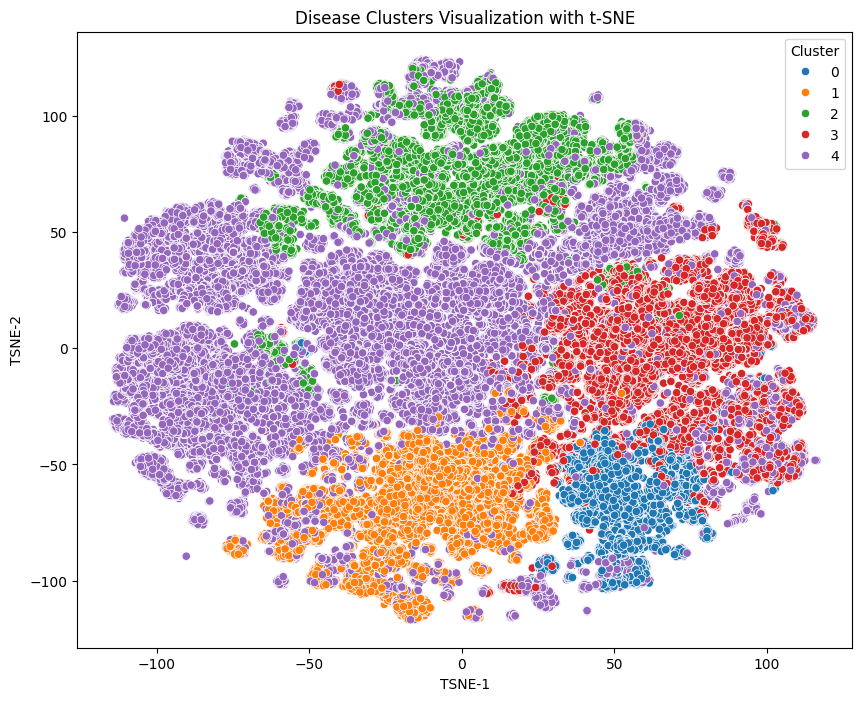

In [6]:
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X)

df['TSNE-1'] = X_embedded[:, 0]
df['TSNE-2'] = X_embedded[:, 1]

plt.figure(figsize=(10,8))
sns.scatterplot(
    x='TSNE-1', y='TSNE-2',
    hue='Cluster',
    palette='tab10',
    data=df,
    legend='full'
)
plt.title('Disease Clusters Visualization with t-SNE')
plt.show()

### Cluster Size Distribution

Visualize how many diseases fall into each cluster.

In [8]:
from sklearn.cluster import KMeans

# Suppose X is your feature data (symptoms without 'diseases')
# Assuming 'df' is your DataFrame with 'diseases' + symptom columns
X = df.drop(columns=['diseases'])

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

cluster_labels = kmeans.labels_  # This is an array of cluster assignments

In [9]:
df['Cluster'] = cluster_labels

/var/folders/67/2zq6hbms6v36wx25ty1vq9mm0000gn/T/ipykernel_83736/1334597417.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='tab10')


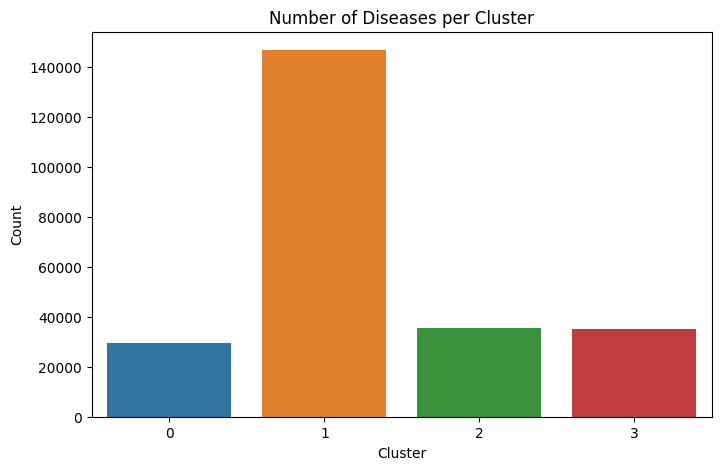

In [10]:
cluster_counts = df['Cluster'].value_counts().sort_index()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='tab10')
plt.title('Number of Diseases per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

### Top Symptoms Per Cluster

Identify the most common symptoms in each cluster by calculating the average symptom presence.

In [11]:
for cluster_num in sorted(df['Cluster'].unique()):
    print(f"\nTop symptoms in Cluster {cluster_num}:")
    cluster_data = X[df['Cluster'] == cluster_num]
    symptom_means = cluster_data.mean().sort_values(ascending=False).head(10)
    print(symptom_means)


Top symptoms in Cluster 0:
sharp abdominal pain    0.481783
lower abdominal pain    0.383376
painful urination       0.265221
suprapubic pain         0.241249
pelvic pain             0.232941
retention of urine      0.216767
frequent urination      0.210501
blood in urine          0.205598
vaginal discharge       0.200218
back pain               0.173590
dtype: float64

Top symptoms in Cluster 1:
abnormal appearing skin             0.102566
leg pain                            0.101531
headache                            0.095911
skin swelling                       0.095455
depressive or psychotic symptoms    0.093180
back pain                           0.081886
skin lesion                         0.081587
dizziness                           0.079148
sharp chest pain                    0.076649
arm pain                            0.075450
dtype: float64

Top symptoms in Cluster 2:
cough                  0.642913
nasal congestion       0.423445
fever                  0.404650
sore throa

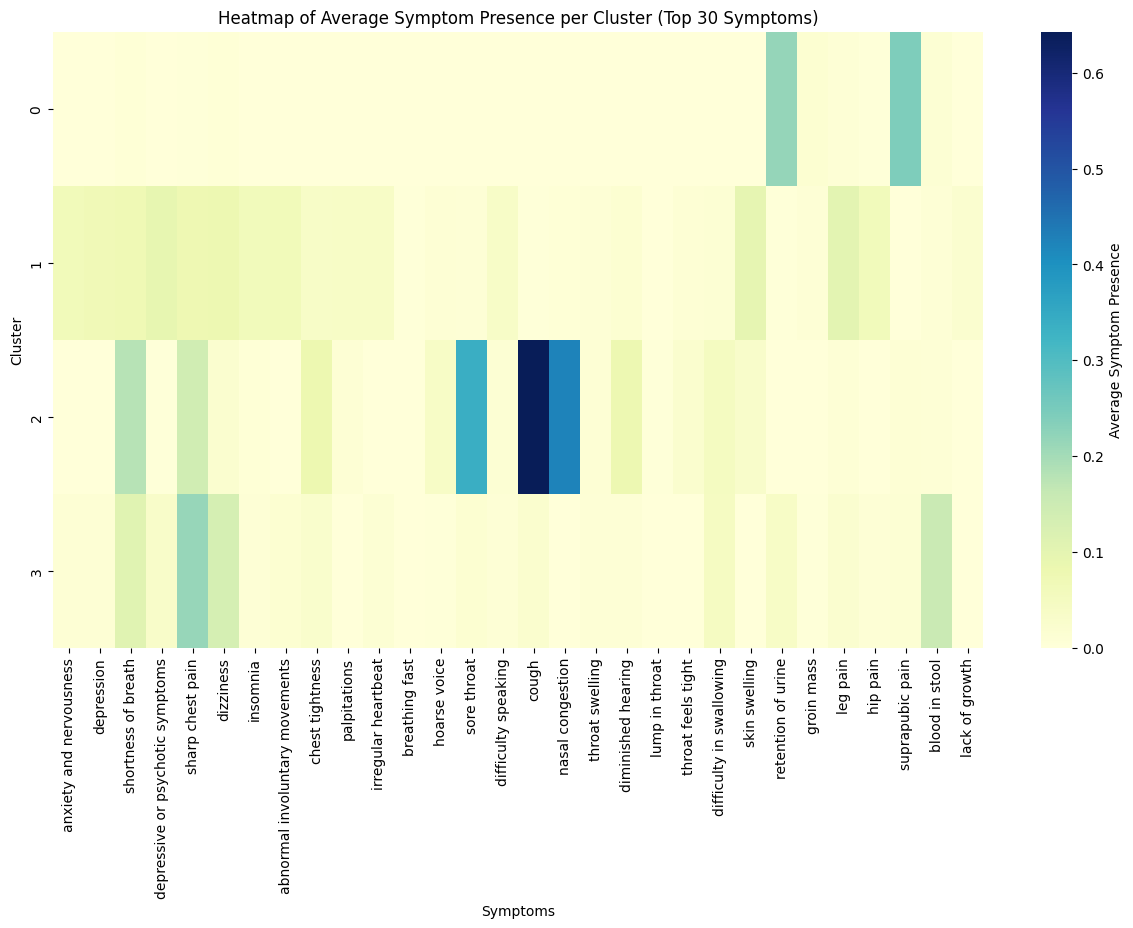

In [12]:
cluster_symptoms = X.copy()
cluster_symptoms['Cluster'] = df['Cluster']

mean_symptoms = cluster_symptoms.groupby('Cluster').mean()

plt.figure(figsize=(15,8))
sns.heatmap(mean_symptoms.iloc[:, :30], cmap='YlGnBu', cbar_kws={'label': 'Average Symptom Presence'})
plt.title('Heatmap of Average Symptom Presence per Cluster (Top 30 Symptoms)')
plt.xlabel('Symptoms')
plt.ylabel('Cluster')
plt.show()

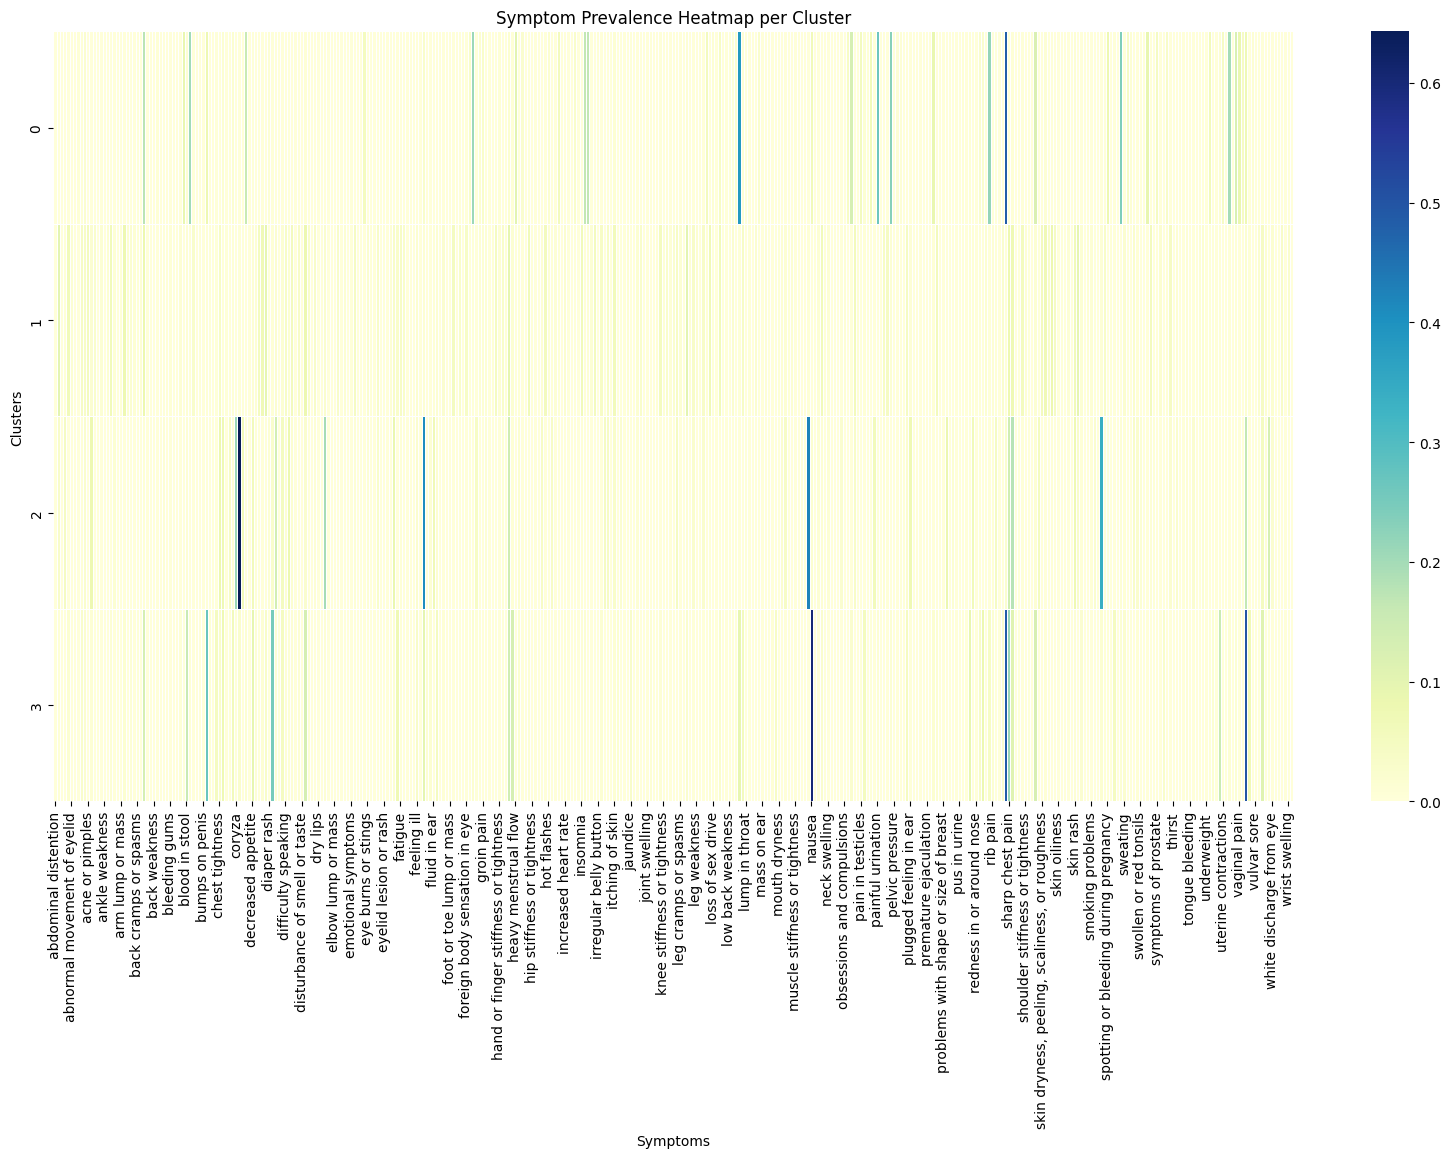

In [14]:
df_symptoms_with_cluster = df.copy()
df_symptoms_with_cluster['Cluster'] = cluster_labels

symptom_cols = df_symptoms_with_cluster.columns.difference(['diseases', 'Cluster'])

cluster_means = df_symptoms_with_cluster.groupby('Cluster')[symptom_cols].mean()

plt.figure(figsize=(20, 10))
sns.heatmap(cluster_means, cmap='YlGnBu', linewidths=0.5)
plt.title('Symptom Prevalence Heatmap per Cluster')
plt.xlabel('Symptoms')
plt.ylabel('Clusters')
plt.xticks(rotation=90)
plt.show()

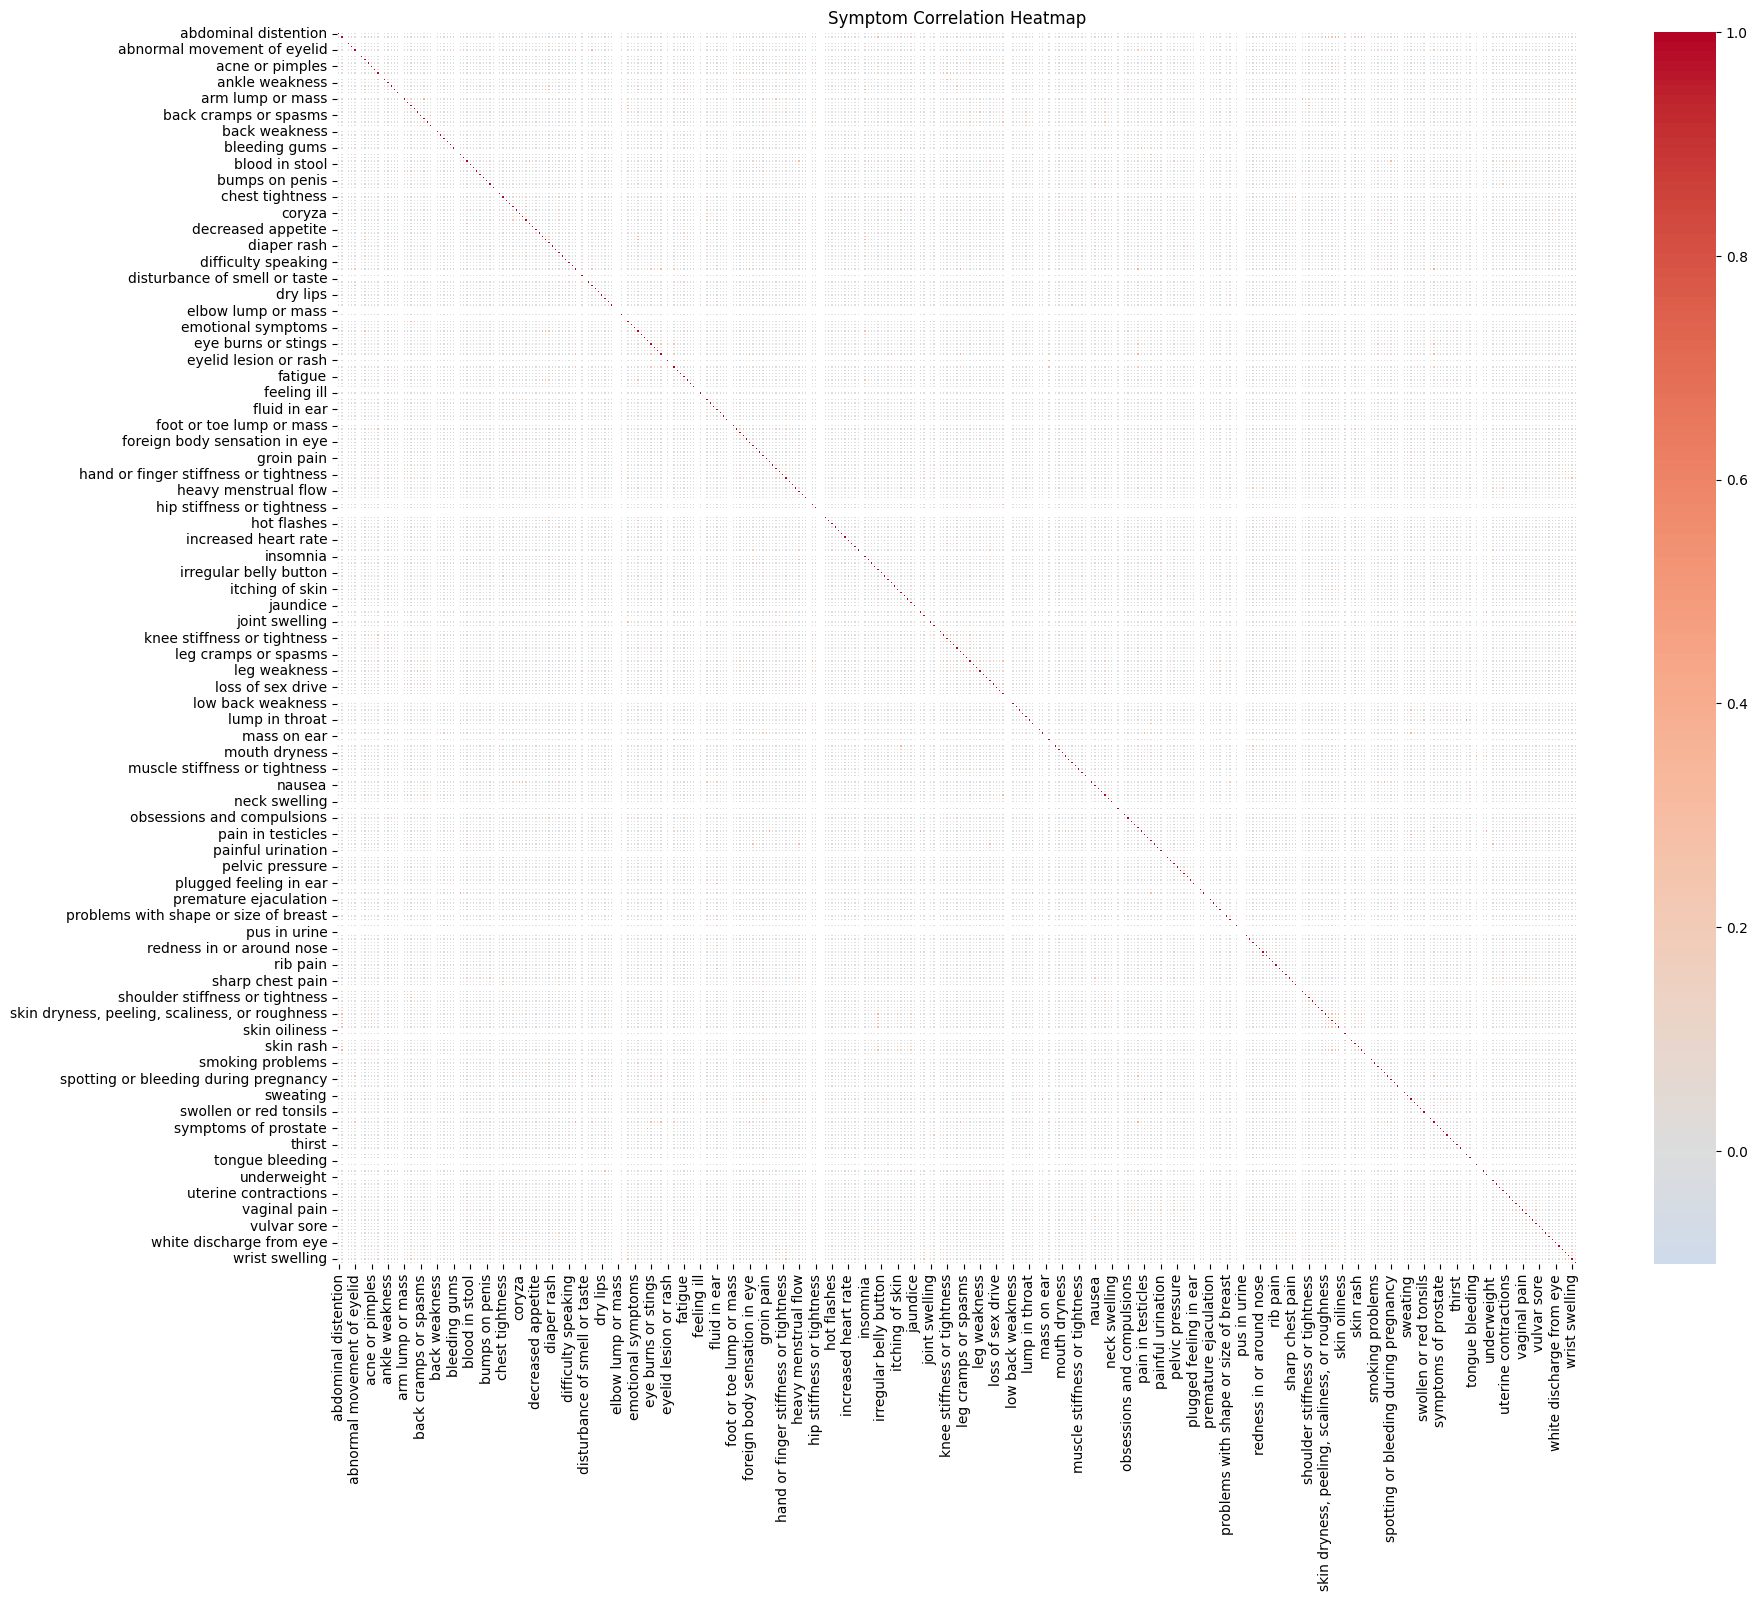

In [15]:
corr_matrix = df_symptoms_with_cluster[symptom_cols].corr()

plt.figure(figsize=(20,16))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, linewidths=0.2)
plt.title('Symptom Correlation Heatmap')
plt.show()

/var/folders/67/2zq6hbms6v36wx25ty1vq9mm0000gn/T/ipykernel_83736/2213717698.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=symptom_freq.index[:30], y=symptom_freq.values[:30], palette='mako')


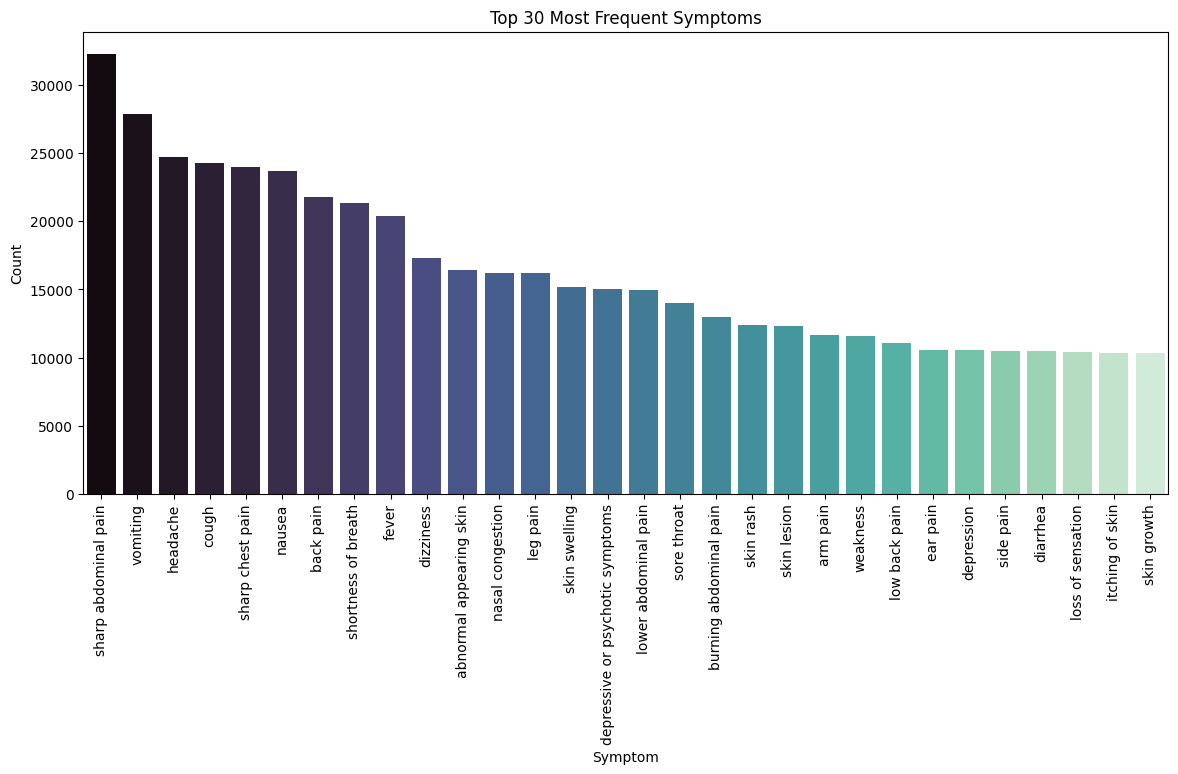

In [16]:
symptom_freq = df_symptoms_with_cluster[symptom_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(14,6))
sns.barplot(x=symptom_freq.index[:30], y=symptom_freq.values[:30], palette='mako')
plt.xticks(rotation=90)
plt.title('Top 30 Most Frequent Symptoms')
plt.xlabel('Symptom')
plt.ylabel('Count')
plt.show()

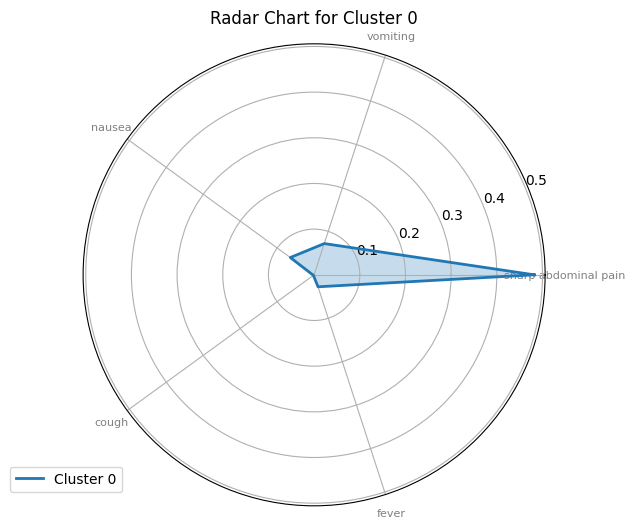

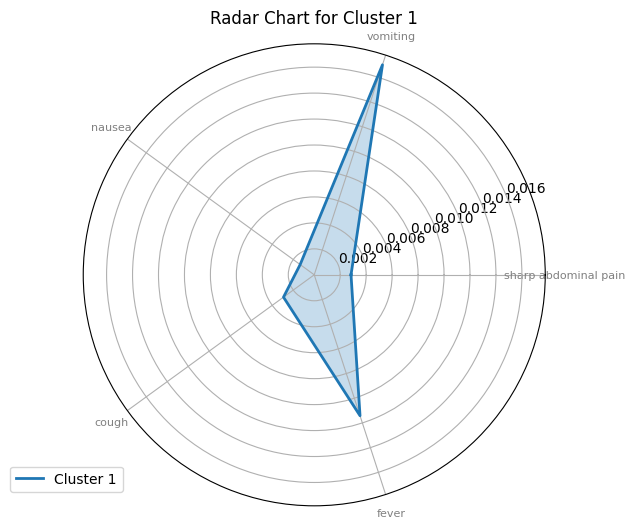

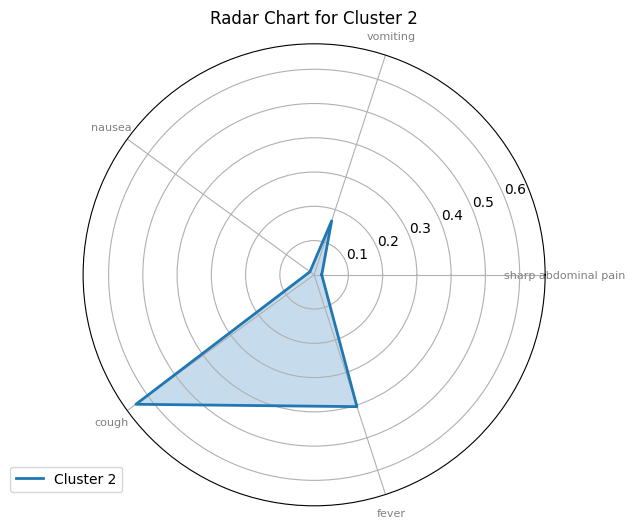

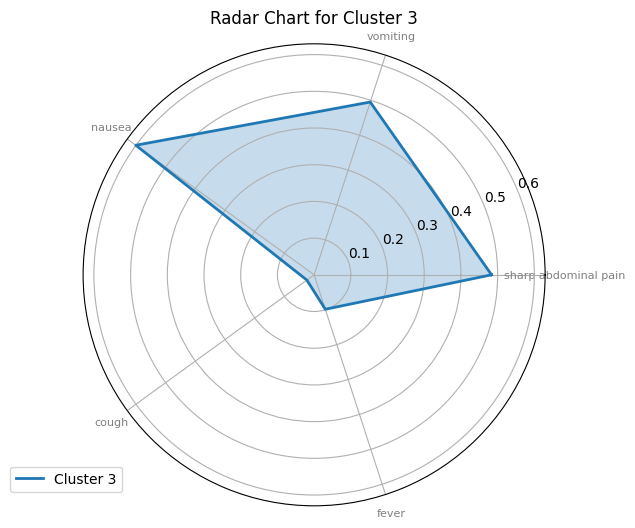

In [17]:
from math import pi

cluster_means = df_symptoms_with_cluster.groupby('Cluster')[symptom_cols].mean()
top_symptoms = cluster_means.mean().sort_values(ascending=False).head(5).index  # overall top 5 symptoms

for cluster in cluster_means.index:
    data = cluster_means.loc[cluster, top_symptoms].values
    categories = list(top_symptoms)
    N = len(categories)
    
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    plt.figure(figsize=(6,6))
    ax = plt.subplot(111, polar=True)
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    
    values = np.append(data, data[0])
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'Cluster {cluster}')
    ax.fill(angles, values, alpha=0.25)
    plt.title(f'Radar Chart for Cluster {cluster}')
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.show()

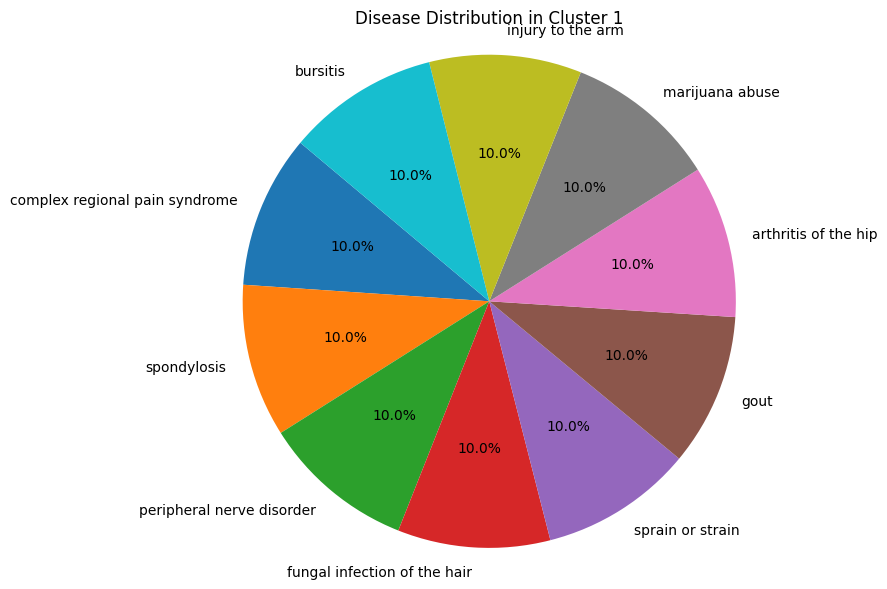

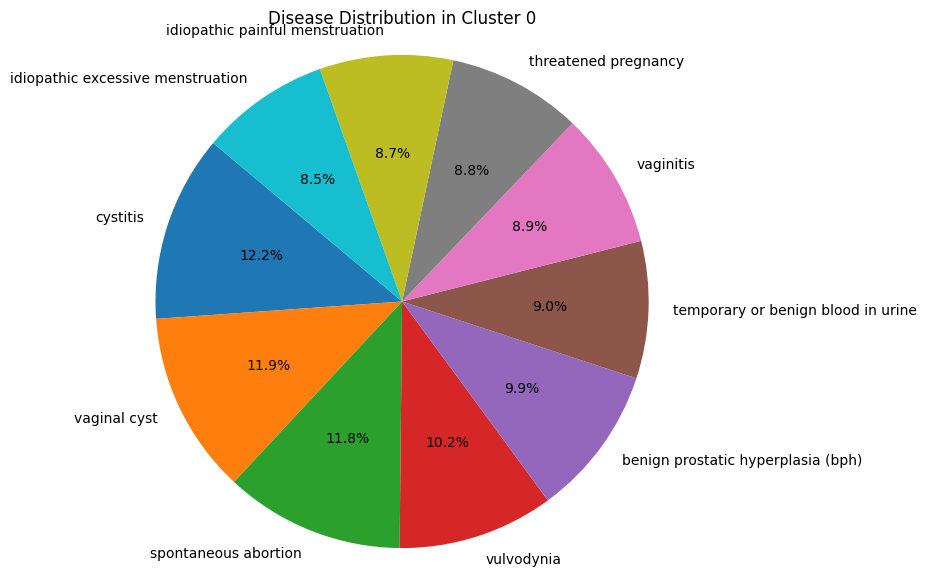

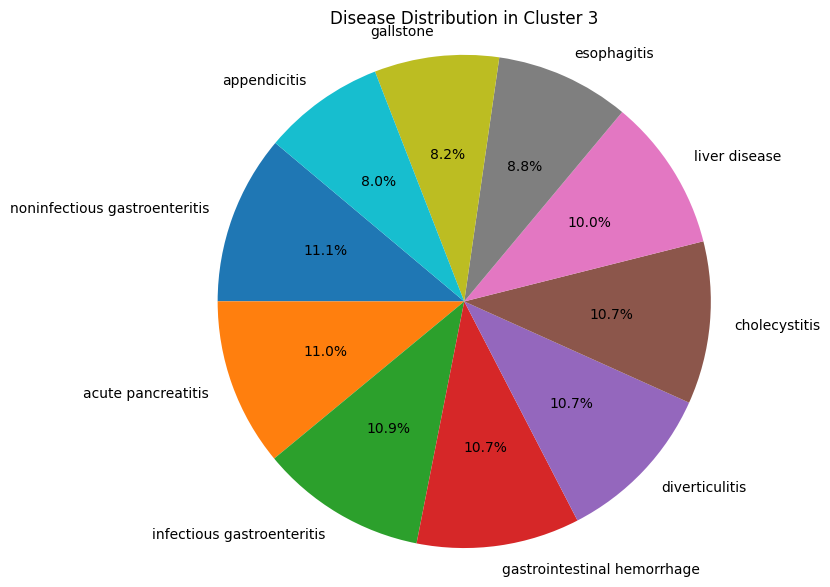

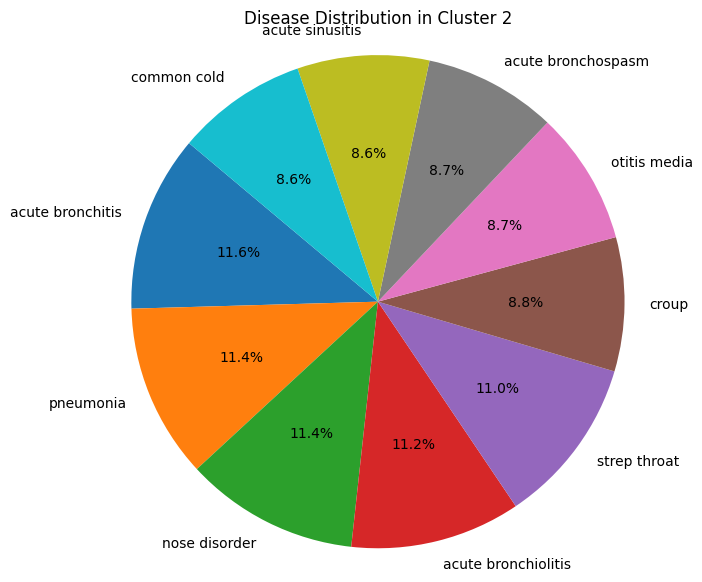

In [18]:
for cluster in df_symptoms_with_cluster['Cluster'].unique():
    subset = df_symptoms_with_cluster[df_symptoms_with_cluster['Cluster'] == cluster]
    disease_counts = subset['diseases'].value_counts().head(10)  # top 10 diseases
    
    plt.figure(figsize=(7,7))
    plt.pie(disease_counts, labels=disease_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Disease Distribution in Cluster {cluster}')
    plt.axis('equal')
    plt.show()

/var/folders/67/2zq6hbms6v36wx25ty1vq9mm0000gn/T/ipykernel_83736/2607579367.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Symptom_Count', data=df_symptoms_with_cluster, palette='tab10')


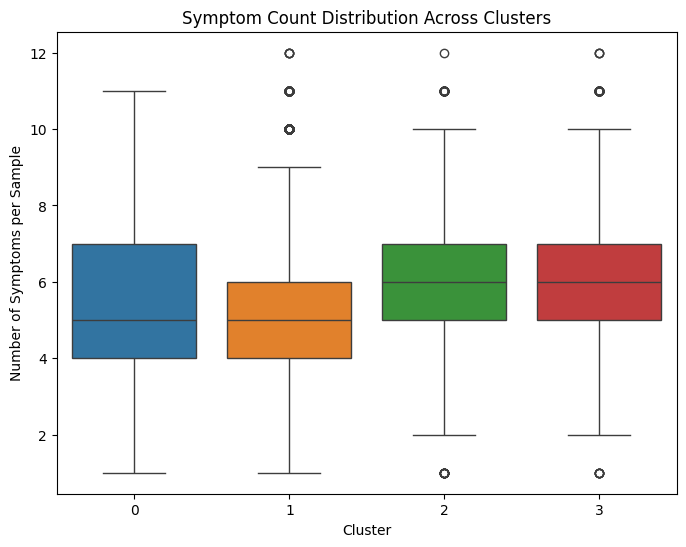

In [19]:
# Calculate number of symptoms per sample (sum of symptoms presence)
df_symptoms_with_cluster['Symptom_Count'] = df_symptoms_with_cluster[symptom_cols].sum(axis=1)

plt.figure(figsize=(8,6))
sns.boxplot(x='Cluster', y='Symptom_Count', data=df_symptoms_with_cluster, palette='tab10')
plt.title('Symptom Count Distribution Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Symptoms per Sample')
plt.show()


### Conclusion

- Diseases have been clustered effectively based on their symptom profiles.
- Visualization helps interpret cluster relationships.
- Symptom patterns per cluster can assist medical understanding.